# Entrega 1 - jugador de Teeko

### Grupo 7:
     - S. Agustina Sierra Lima C.I. 4.647.235-6
     - V. Sebastian Volti Diano C.I...
     - C. Alejandro Clara C.I. 4.772.294-4

## 1. Objetivo

El objetivo de esta tarea es construir un jugador de Teeko utilizando técnicas de aprendizaje automático.
En el marco de la definición de aprendizaje automático identificamos las tres variables $T$, $P$ y $E$ en nuestro diseño de la siguiente manera:

- Deseamos mejorar en la tarea $T$: Jugar al Teeko.

- Respecto a la siguiente medida $P$: % de juegos ganados.

- Basándonos en la experiencia $E$:

  i) Inicialmente el algoritmo aprende jugando contra un oponente que juega de forma aleatoria.
  
  ii) Luego se usa como oponente una versión aprendida en alguna iteración anterior. 

Para representar lo que efectivamente queremos aprender hemos definido ciertas funciones:   
  
$ChooseMove:tablero\rightarrow movimiento$, la cual toma un tablero como entrada y su salida es un movimiento del conjunto de movimientos posibles que un jugador puede hacer.

$V:tablero\rightarrow \mathbb{R}$, donde $V$ asigna los valores mas altos a los mejores tableros, es decir, a los que tienen mayores chances de llevar a ganar la partida.

De esta forma hemos traducido el problema de mejorar el rendimiento $P$ de una tarea $T$, al problema de encontrar la función $ChooseMove$ tal que, dado un tablero devuelve el mejor movimiento posible para un jugador. Es decir, el movimiento que lleve al tablero con valor más alto según $V$, dentro de los movimientos posibles.

Tal y como vimos en clase la función $V$ no es efectivamente computable, lo que la hace no operativa.
El objetivo que nos proponemos es encontrar la mejor aproximación a tal función.  
Entonces definimos:  
  
$V_{op}:tablero\rightarrow \mathbb{R}$
Donde $V_{op}$ la definimos como una serie de características que representan el estado del tablero y además cumple que:  
  
$V_{op}(t_{ganador})=1$  
$V_{op}(t_{perdedor})=-1$  
$V_{op}(t_{empate})=0$


$V_{op}(t)=w_{0}+w_{1}X_{1}+w_{2}X_{2}+w_{3}X_{3}+w_{4}X_{4}+w_{5}X_{5}+w_{6}X_{6}+w_{7}X_{7}+w_{8}X_{8}$  
  
Donde:    
$X_{1}=$ Cantidad de adyacencias horizontales del jugador 1   
$X_{2}=$ Cantidad de adyacencias vertivales del jugador 1  
$X_{3}=$ Cantidad de adyacencias diagonales vistas de izquierda (arriba) a derecha (abajo) del jugador 1   
$X_{4}=$ Cantidad de adyacencias diagonales vistas de derecha (arriba) a izquierda (abajo) del jugador 1   
$X_{5}=$ Cantidad de adyacencias horizontales del jugador 2   
$X_{6}=$ Cantidad de adyacencias verticales del jugador 2  
$X_{7}=$ Cantidad de adyacencias diagonales vistas de izquierda (arriba) a derecha (abajo) del jugador 2  
$X_{8}=$ Cantidad de adyacencias diagonales vistas de derecha (arriba) a izquierda (abajo) del jugador 2   
  
En conclusión, nos proponemos encontrar los valores $w_{i}$ óptimos para aproximar $V_{op}$ a $V$.
Utilizamos la técnica de minimos cuadrados vista en clase, variando algunos parámetros que veremos más adelante en el informe.


## 2. Diseño

## 2.1 Juego

- El juego se compone de un tablero de 5x5 y cuatro fichas para cada jugador. El objetivo es lograr tener cuatro fichas en línea recta (vertical, horizontal o diagonal) o en un cuadrado de cuatro espacios adyacentes.
- Una de las simplificaciones especificadas en la letra es que se comienza con un tablero con todas sus fichas posicionadas y solo resta moverlas. Para elegir tales tableros iniciales utilizamos una función que los genera aleatoriamente.
- Existen fichas negras y rojas, dado que las reglas indican que siempre comienza el jugador con las fichas negras diremos que el jugador que nos interesa entrenar (el jugador 1) es el que juega primero, es decir, el que tiene las fichas negras. Las fichas rojas corresponderán al oponente (el jugador 2).
- Definimos como empate si se dan mas de 500 movimientos en total y aún ningún jugador ha ganado.


## 2.2 Tablero

- Representamos un tablero como una matriz de 5x5 en donde colocamos 1's en las coordenadas que el jugador 1 tiene sus fichas y 2's en las coordenadas donde el jugador 2 tiene sus fichas. El resto de los lugares libres se representan con 0's.
- Luego de haber leído el ejemplo del juego de damas quisimos trazar una similitud con el juego en cuestión. Creemos que las características del tablero que elegimos son las más representativas del estado del juego, en el sentido de que con solo listarlas nos da una idea de qué jugador está más cerca de ganar y asi poder llegar a una forma correcta de dar valores a los diferentes estados de los tableros. También decidimos elegir estos atributos porque son los que mejor representan las distintas formas de ganar que tienen los jugadores.
  
A continuación, una serie de ejemplos:  
  
$\begin{pmatrix}
0 & 1 & 1 & 1 & 1 \\
0 & 2 & 0 & 0 & 2 \\
0 & 2 & 0 & 0 & 0 \\
0 & 0 & 2 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}$ $X_{1}=$ 3, $X_{2}=$ 0, $X_{3}=$ 0, $X_{4}=$ 0, $X_{5}=$ 0, $X_{6}=$ 1, $X_{7}=$ 1, $X_{8}=$ 0  

$\begin{pmatrix}
0 & 0 & 1 & 0 & 1 \\
0 & 2 & 2 & 0 & 1 \\
0 & 2 & 2 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}$  $X_{1}=$ 0, $X_{2}=$ 2, $X_{3}=$ 0, $X_{4}=$ 0, $X_{5}=$ 2, $X_{6}=$ 2, $X_{7}=$ 1, $X_{8}=$ 1

$\begin{pmatrix}  
1 & 0 & 2 & 2 & 2 \\
0 & 1 & 0 & 0 & 2 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}$ $X_{1}=$ 0, $X_{2}=$ 0, $X_{3}=$ 3, $X_{4}=$ 0, $X_{5}=$ 2, $X_{6}=$ 1, $X_{7}=$ 1, $X_{8}=$ 0  
  
Estos son ejemplos de tableros finales. En términos generales sabemos que tenemos tableros finales si:
- Las adyacencias horizontales son 3 ó
- Las adyacencias verticales son 3 ó
- Las adyacencias diagonales de izquierda (arriba) a derecha (abajo) son 3 ó
- Las adyacencias diagonales de derecha (arriba) a izquierda (abajo) son 3 ó
- Las adyacencias horizontales son 2 y las adyacencias verticales son 2


## 2.3 Algoritmo

### 2.3.1 Visión general

En términos generales, y siguiendo la idea planteada en el libro, dividimos el algoritmo en 4 módulos: _Performance System, Critic, Generalizer y Generator_.

**Performance System**: Utilizando las funciones aprendidas, es el que se encarga de realizar una partida. Toma como entrada un tablero inicial y su salida corresponde a un historial de juego.
Definimos un historial como todos los tableros por los que pasa el jugador 1 luego de que realiza un movimiento.  
  
**Critic**: Se encarga de producir los ejemplos de entrenamiento. Toma como entrada un historial de juego y su salida es un conjunto de tuplas $<t,V_{train}(t)>$, donde $V_{train}(t)$ es un valor aproximado que calculamos de la siguiente manera:
  
  $V_{train}(t_{intermedio}) ← V_{op}(t'_{siguiente\space tablero\space en\space el\space historial})$
  
  
**Generalizer**: Toma como entrada los ejemplos de entrenamiento y su salida es una nueva aproximación de la función objetivo, luego de haber aplicado el algoritmo de minimos cuadrados. Aquí es donde se ajustan los valores $w_{i}$. El algoritmo de ajuste que utilizamos es el que se dio en clase.
  
**Generator**: Es el encargado tanto de generar un nuevo tablero inicial, así como de configurar todos los parámetros necesarios para una nueva partida. Toma como parámetro una función $V_{op}$ y su salida es un nuevo tablero inicial.

Definimos una **iteración** como una vuelta completa sobre cada uno de los módulos definidos arriba.

### 2.3.2 Ajuste de la función

El orden para completar un ajuste de la función objetivo sería: _Generator -> Performance System -> Critic -> Generalizer_ y el ajuste se realiza en el módulo _Generalizer_.

### 2.3.3 Parametrización

A nivel de implementación, decidimos diseñar el código de manera tal que nos resultara fácil ajustar los parámetros para el momento de realizar la experimentación. En dicha sección se prueba con varios valores de μ, en algunos casos se prueba con enfriamiento, se prueba con un factor de descuento, etc.

## 2.4 Contrarios

- Para generar los tableros al azar se genera una matriz de 5x5 con valores todos en 0. Luego, para poblar el tablero, para cada jugador se generan tuplas que representan las coordenadas de dónde va a ser colocada la ficha. En ambas coordenadas se usa la función de Python randint(), hasta que se encuentra un lugar libre y se coloca allí la ficha.
- Para generar los movimientos al azar se generan todos los posibles siguientes tableros, se los guarda en una lista _L_ y se usa la función de Python choice sobre _L_, la cual retorna un elemento al azar.
- Los $w_{i}$ se actualizan en cada iteración.

## 3. Experimentación

## 3.1 Oponente Aleatorio 

En esta primera parte mostraremos los resultados obtenidos de jugar con un oponente que siempre juegue de forma aleatoria.
En cada punto se jugo un total de 120 partidas, ajustando los $w_{i}$ luego de cada partida.

### 3.1.1 $w_{i}$ iniciales

Siempre que se comienza a entrenar, se realiza un entrenamiento inicial con tableros finales valorados con 1, 0 o -1. Una vez generado este conjunto de tableros finales creamos un historial y llamamos a los modulos _Critic_ y luego a _Generalizer_. Así, ajustamos tantas veces como tableros finales haya en el conjunto. Finalmente, con la función $V$ y con los  $w_{i}$ conseguidos iniciamos el entrenamiento.
     
Probamos con tres vectores iniciales (pre-entrenamiento inicial) distintos y nos quedamos con el vector de $w_{i}$ que nos dio un porcentaje más alto de partidas ganadas.  
Dichos vectores fueron los siguientes:  
     1. (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)
     2. (0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75)
     3. (0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45)
    
  Resultados:  
<table>
  <tr style="font-weight:bold">
    <th>(w0,w1,w2,w3,w4,w5,w6,w7,w8)</th>
    <th>Partidas ganadas</th>
    <th>% de partidas ganadas</th>
    <th>% de partidas empatadas</th>
  </tr>   
  <tr>
    <td>(0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)</td>
    <td>91</td>
    <td>50.5</td>
    <td>13.3</td>
  </tr>
  <tr>
    <td>(0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75)</td>
    <td>76</td>
    <td>42.2</td>
    <td>15.6</td>
  </tr>
  <tr>
    <td>(0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45)</td>
    <td>106</td>
    <td>58.8</td>
    <td>13.8</td>
  </tr>    
</table>

En conclusión, nos quedamos con el vector inicial $W$ igual a 0.45 en todas sus entradas.  
  
### 3.1.2 Elección del proximo movimiento
En todos los experimentos que realizamos en esta sección, el jugador dado el conjunto de todos los movimientos posbles elige el que tiene una valoracion mayor segun la funcion objetivo $V$ que conoce hasta el momento.  

### 3.1.3 Aproximacion para $𝑉_{𝑡𝑟𝑎𝑖𝑛}(𝑡)$

Si bien al principio la idea fue mapear el espacio de los posibles tableros a un entorno (-1, 1) donde los tableros ganadores tomaran el valor 1 y los perdedores el valor -1, esto no se pudo lograr de forma estricta, dado que los $w_{i}$ tendían a crecer y las caracteristicas que decidimos representar de los tableros podían llegar a ser números que hicieran crecer la función, haciendo que tomara valores más grandes que 1.

Además, de alguna manera, imponer que los tableros finales tuvieran valores -1 o 1 despistaba al algoritmo. Creemos que puede haber sido por tener tableros anteriores con valores más (menos) grandes que un tablero final ganador (perdedor). Lo que hicimos para enfrentar este problema fue directamente descartar los tableros finales al momento de generar el conjunto de entrenamiento. 

Otra opción podría haber sido utilizar la noción de que dado un $t\space/\space t\space es \space final =>$ $V_{train}(t)=V_{op}(t)$ logrando así mantener la idea de que los tableros con valores mas grandes son mejores.

### 3.1.4 Movimientos aleatorios
Uno de los fenómenos que observamos es que luego de muchos entrenamientos el algoritmo se estancaba y no exporaba nuevos tableros. Decidimos probar tomando cada X movimientos un movimiento aleatorio y ver qué sucedía con el porcentaje de partidas gandas. Este fue el resultado:
  
<table>
  <tr>
    <th>Sin movimientos aleatorios</th>
    <th>Cada 2 movimientos uno aleatorio</th>
    <th>Cada 3 movimientos uno aleatorio</th>
    <th>Cada 4 movimientos uno aleatorio</th>
    <th>Cada 5 movimientos uno aleatorio</th>
  </tr>
  <tr>
    <td>%</td>
    <td>77.7%</td>
    <td>86.6%</td>
    <td>80.5%</td>
    <td>83.3%</td>
  </tr>    
</table>
  
  En conclusión, nos quedaremos con la configuración que nos dio un total de 86.6% de partidas ganadas. Es decir, elegir un movimiento aleatorio cada 3 movimientos.
  
  _**Observación:** Notamos que luego de fijar esta variante casi no tenemos empates._
  
### 3.1.5 Tasa de aprendizaje μ y enfriamiento
A nivel conceptual, a mayor valor de μ, mayor es el ajuste. Fuimos probando con distintos valores de μ en cada entrenamiento, y los resultados fueron los siguientes:
    
<table>
  <tr>
    <th>μ</th>
    <th>% partidas ganadas</th>
  </tr>
  <tr>
    <td>μ=0.1</td>
    <td>93.3</td>
  </tr>
   <tr>
    <td>μ=0.01</td>
    <td>94.4</td>
  </tr>
   <tr>
    <td>μ=0.001</td>
    <td>95.6</td>
  </tr>  
</table>

En un intento por mejorar aún más el porcentaje probamos con distintas tasas de enfriamiento, pero no notamos cambios notorios en los resultados finales.

En conclusión, nos quedarnos con μ fijo igual a 0.001.


### 3.1.6 Factor de descuento $\gamma$
Definimos un factor de descuento igual a $(0.9)^k$ con el objetivo de dar una menor valoración a los tableros que estan más cerca del tablero inicial.

El porcentaje de partidas ganadas sin el factor de descuento fue de 95.6%.

Con el factor de descuento fue de 96.4%, por lo que decidimos conservarlo.


## 3.2 Oponente inteligente

En esta sección veremos los resultados obtenidos al jugar contra un oponente que es una version anterior del jugador 1.

### 3.2.1 Oponente con pesos fijos
 
Primero probamos entrenar contra un jugador 2 que utiliza la funcion objetivo $V_{op}$ parte 3.1 y nucna la actualiza :

Aquí notamos que con los hiperparamentros utilizados en la parte 3.2 el jugador 1 tenia un porcentaje de victorias mucho menor, alredodr de un 40% lo que nos llevo a cambiar variables.  
- Inicialmente aumentamos la cantidad de partidas jugadas.  
- Luego cambiamos la cantidad de movimientos aleatorios del jugador 1 a cero, pues en la parte 3.2 ya exploro             nuevos caminos y esta vez queremos que tome siempre el movimiento optimo con la funcion objetivo conocida         hasta el momento.  
- Como notamos que igualmente el porcentaje de partidas ganadas era bajo, decidimos probar con distintos factores de aprendizaje.
- Otro fenomeno que notamos fue el aumento de empates que en la seccion anterior habiamos logrado bajar.  
<table>
  <tr>
    <th>μ = 0.001</th>
    <th>μ = 0.01</th>
    <th>μ = 0.1</th>
  </tr>
  <tr>
    <td>jugador 1 23.4% / juegador 2 22.7% </td>
    <td>jugador 1 23.9% / juegador 2 21.8%</td>
    <td>jugador 1 49.6% / juegador 2 41.0%</td>  
  </tr>
     <caption>Esta tabla representa el porcentaje de partidas ganadas de cada jugador  jugador 1/jugador 2 variando μ </caption>
</table>



- Aqui podemos ver tres graficas donde cada una representa la suma de la cantidad de partidas ganadas para cada jugador en funcion de la cantidad de patidas jugadas. La orimera es con μ=0.001 , la segunda con μ=0.01 y la tercera μ=0.1  
  
<img src="grafica1.jpeg" width=400 height=400>  


<img src="grafica2.jpeg" width=400 height=400>  
  

<img src="grafica3.jpeg" width=400 height=400>  

### 3.2.2 Oponente actualizado

Luego acualizamos la funcion $V_{op}$ que ultiliza el jugador 2 para elegir su proximo movimiento cada 20 partidas:

Aqui el porcentaje de partidas ganadas por el jugador 1 es y si vemos la grafica analoga a la parte anterior se ve claramente como el jugador 2 gana mas partidads.

## 3.3 Competencia

En este punto pusimos a competir dos versiones iguales del jugador 1.

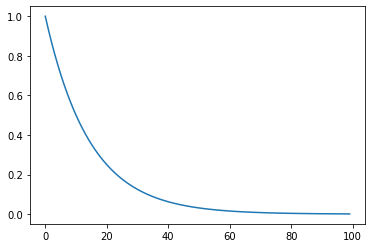

In [2]:
import matplotlib.pyplot
matplotlib.pyplot.plot(range(0,100), [2**-(x/10) for x in range(0,100)])

## 4. Conclusión

- Los mejores resultados logicamente se dieron cuendo jugabamos con un opnente aleatorio , dado que la inteligencia de tal era nula. A medida que el oponente se volvia mas inteligente el porcentaje de partidas ganadas decrecio notoriamente. En este punto tambien observamos que con un oponete aleatorio casi no habian empates.
- Otro punto a destacar, cuando oponente es aleatorio el echo de que usar enfriamiento en la taza de aprendizaje casi no cambio los resultados, con un μ =0.001 que es bastante pequeño obtuvimos buenos resultados. Lo que significa que si desde un principio limitabamos la variacion de el vector $W$ podiamos converger a valores satisfactorios. En cotraposicion con esto cuando el oponente es una version anterior del jugador 1 necitamos una taza de aprendizaje inicial mas alta. Obtuvimos mejores resultados cambiando μ =0.1 y el enfriamiento en este punto tampoco tuvo grandes variaciones en el resultado final.
- Tambien notamos que cuando entrenamos contra un oponente random, en un momento el porcentaje de partidas ganadas se estanca. Esto pudimos solucionarlo haciendo que el jugador 1 cada cierta cantidad de movimientos realize uno aleatorio, permitiendo asi que explore nuevos caminos y no se estanque su aprendizaje. 
  Lo curioso de esto es que cuando entrenamos contra un oponente inteligente tomar movimintos aleatorios no cambia el porcentaje de partidas ganadas. Atribuimos esto a que el la version anteror ya exploro todos los caminos que puede con los hiperparametros que conocidos.  
- Algo que creemos que mejoraria el algoritmo es poder normalizar los atributos y los $w_{i}$ de forma tal de poder logara que la imagen de la funcion $V_{op}$ realemnte se encuentrte en el intervalos $[-1,1]$. Logrando asi poder darle valores conocidos a tableros finales. 
  Inicialmente creimos conveniente que para tener una idea de que valores $w_{i}$ para comenza a jugar podia ser    utiles, crear historiales de juego que conste de solo un tablero final dado que en principio $V_{train}$ para esos tableros era conocida , pero con el avance de la tare nos dimos cuenta que era una falacia dado que existian tableros intemedios con un valor de $V_{op}$ mayor que 1.  
- Tambie podria mejorar el algoritmo cambiar la forma en la que elegimos el proximo movimiento, la forma que nosotros aplicamos si bien nos fue util no creemos que sea la mejor. Una alternativa a esto es dado el conjunto de movimientos posibles para el jugador 1 si suponemos que nuestro oponente se mueve de forma optima (segun la $V_{op}$ conocida hasta el momento) podemoms quedarnos con el movimiento que lleve a el oponente a el tablero menor valorado para el.